In [1]:
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples = 150,     # 150개
                 n_features = 2,      # 2차원
                 centers = 3,         # 3개의 클러스터 혹은 중심
                 cluster_std = 0.5,   # 클러스터의 표준편차
                 shuffle = True,      # 무작위로 섞을 것인가?
                 random_state=0)      # seed 값

In [3]:
import matplotlib.pyplot as plt

### 2차원 산전도 도시

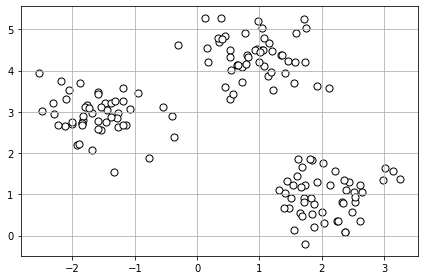

In [5]:
plt.scatter(X[:,0],
            X[:,1],
            c = 'white',
            marker = 'o',
            edgecolor = 'black',
            s = 50)
plt.grid()
plt.tight_layout()
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters = 3,      # 클러스터 개수
           init = 'random',      # k평균 알고리즘 설정, 초기 중심 좌표를 무작위로 선정
           n_init=10,            # 각각의 센트로이드에서 독립적으로 몇 번을 실행하여 가장 낮은 제곱 오차합 값을 찾아냄 
           max_iter=300,         # 2번째와 3번째 과정을 최대 몇번까지 반복할 것인지 설정
            tol = 1e-04,         # 허용 오차 값에 도달하면 일찍 종료
            random_state=0)

In [8]:
y_km = km.fit_predict(X)  # 예측 클러스터 레이블 생성

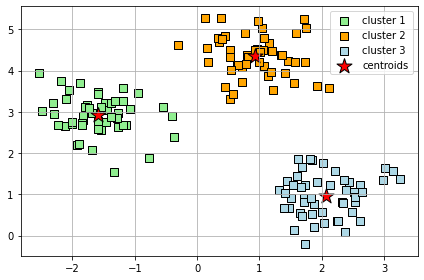

In [10]:
plt.scatter(X[y_km == 0,0],
           X[y_km == 0,1],
           s=50, c='lightgreen',
           marker = 's', edgecolor='black',
           label='cluster 1')

plt.scatter(X[y_km == 1,0],
           X[y_km == 1,1],
           s=50, c='orange',
           marker = 's', edgecolor='black',
           label='cluster 2')

plt.scatter(X[y_km == 2,0],
           X[y_km == 2,1],
           s=50, c='lightblue',
           marker = 's', edgecolor='black',
           label='cluster 3')

plt.scatter(km.cluster_centers_[:,0],
           km.cluster_centers_[:,1],
           s=250, c='red',
           marker = '*', edgecolor='black',
           label='centroids')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

### K-means++ 알고리즘(현명한 초기 센트로이드 할당)

In [ ]:
# 권장되는 기본 설정값
km = KMeans(n_clusters = 3,      # 클러스터 개수
           init = 'k-means++',   # k평균++ 알고리즘 설정
           n_init=10,            # 각각의 센트로이드에서 독립적으로 몇 번을 실행하여 가장 낮은 제곱 오차합 값을 찾아냄 
           max_iter=300,         # 2번째와 3번째 과정을 최대 몇번까지 반복할 것인지 설정
            tol = 1e-04,         # 허용 오차 값에 도달하면 일찍 종료
            random_state=0)

In [11]:
print('왜곡 : %.2f' %km.inertia_)

왜곡 : 72.48


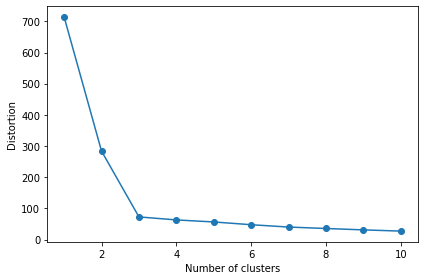

In [12]:
distortions = []
for i in range(1,11):
    km = KMeans(n_clusters = i,      # 클러스터 개수
           init = 'k-means++',   # k평균++ 알고리즘 설정
           n_init=10,            # 각각의 센트로이드에서 독립적으로 몇 번을 실행하여 가장 낮은 제곱 오차합 값을 찾아냄 
           max_iter=300,         # 2번째와 3번째 과정을 최대 몇번까지 반복할 것인지 설정
            tol = 1e-04,         # 허용 오차 값에 도달하면 일찍 종료
            random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1,11), distortions, marker= 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

### 실루엣 그래프

In [13]:
from sklearn.metrics import silhouette_samples

In [14]:
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')